# **Cài đặt môi trường, thư viện**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.9 MB/s eta 0:00:00


In [3]:
pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 48.9 MB/s eta 0:00:00


In [4]:
import pandas as pd

import emoji
import re
import string

import underthesea
from underthesea import text_normalize

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from wordcloud import WordCloud

In [5]:
data = pd.read_excel("/content/gdrive/MyDrive/Tài liệu đại cương/Học kỳ 5/NLP/Project/crawl_data.xlsx")

# **1. Tổng quan bộ dữ liệu**

In [6]:
data

,name,counts,comment,rate,type
0,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Tính năng nổi bật: nhỏ gọn giao hàng nhanh. đú...,5,balo
1,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Túi hơi mỏng hơn mong đợi,4,balo
2,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k","Ba lô cực kỳ xinh. Nhỏ, gọn. Với giá này phải ...",5,balo
3,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Bé tí cho trẻ con,3,balo
4,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Chất lượng sản phẩm: okTính năng nổi bật: bé b...,5,balo
...,...,...,...,...,...
1434,USB WiFi TP LINK 600Mbps,"8,2k","Sản phẩm tốt, giao khá nhanh, chất lượng tuyệt...",4,usb
1435,USB WiFi TP LINK 600Mbps,"8,2k","Shop gọi điện, trả lời tin nhắn, tư vấn rất là...",5,usb
1436,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: okChất lượng sản phẩm: okSh...,5,usb
1437,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: sản phẩm nhìn ok. đóng gói ...,3,usb


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1439 non-null   object
 1   counts   1439 non-null   object
 2   comment  1439 non-null   object
 3   rate     1439 non-null   int64 
 4   type     1439 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.3+ KB


# **2. Tiền xử lý**

## **2.1. Xác định một số chức năng để loại bỏ dữ liệu không mong muốn**

1. Tách các từ viết dính nhau
2. Loại bỏ các từ thừa
3. Xóa emoji
4. Xóa các ký tự xuống dòng
5. Đưa tất cả các chữ cái về chữ thường
6. Loại bỏ các chữ số
7. Loại bỏ các dấu câu, các ký tự đặc biệt
8. Chuẩn hóa kiểu gõ dấu
9. Xử lý láy âm tiết
10. Thay thế các từ viết tắt


In [8]:
# Hàm loại bỏ các dữ liệu không mong muốn từ dữ liệu

# Hàm xóa emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Hàm thay thế các từ viết tắt
abbreviation_dict = {
    'ok': ' tốt ', 'mn': ' mọi người ', 'sn': ' suy nghĩ ', 'đc': ' được ',
    'ko': ' không ', 'k ': ' không ', 'sl': ' số lượng ', 'sp': ' sản phẩm ',
    ' ng ': ' người ', 'mng': ' mọi người ', ' vd ': ' video ', 'dc': ' được ',
    'pk': ' phụ kiện ', 'sale': ' giảm giá ', 'vs': ' với ', 'siu': ' rất ',
    'cmt': ' bình luận ', 'tks': ' cảm ơn ', 'sd': ' sử dụng ', 'kb': ' không biết ',
    'kh ': ' không ', 'cskh': ' chăm sóc khách hàng ', 'nhưg': ' nhưng ', 'j': ' gì ',
    ' z': ' vậy ', 'ntnao': ' như thế nào ', 'ntn': ' như thế nào ', 'dk': ' được ',
    ' m ': ' mình ', 'nv': ' như vậy ', 'mk': ' mình ', 'mik': ' mình ',
    'đvvc': ' đơn vị vận chuyển ', 'lm': ' làm ', ' ae': ' anh em ', 'oke': ' tốt ',
    ' ưng ': ' hài lòng ', 'combo': ' tổ hợp ', 'rv': ' review ', 'đt': ' điện thoại ', 'chs': ' sử dụng ',
    'nt': ' nhắn tin ', 'nx': ' nữa ', ' t ': 'tôi', 'cx': 'cũng'
}

def replace_abbreviations(text):
    pattern = re.compile(r'\b(?:%s)\b' % '|'.join(re.escape(key) for key in abbreviation_dict.keys()))
    return pattern.sub(lambda x: abbreviation_dict[x.group()], text)

# Xử lý các trường hợp dính nhau
def separate_words(text):
    words = text.split(',')
    modified_words = []

    for word in words:
        separated_words = re.findall(r'[a-zA-Z][^A-Z]*', word)
        modified_words.append(' '.join(separated_words).strip())

    result = ', '.join(modified_words)
    return result

# Xử lý láy âm tiết
def handle_repeated_syllables(text):
    repeated_syllables_pattern = re.compile(r'(\w+?)\1+', re.UNICODE)
    def handle_repetition(match):
        word = match.group(1)
        return word

    processed_text = repeated_syllables_pattern.sub(handle_repetition, text)
    return processed_text

def data_processing(text):
    # 1. Tách các từ viết dính nhau
    text = separate_words(text)
    # 2. Loại bỏ các từ thừa
    text = re.sub(r'Tính năng nổi bật: ',' ',text)
    text = re.sub(r'Chất lượng sản phẩm:',' ',text)
    # 3. Xóa emoji
    text = remove_emoji(text)
    # 4. Xóa các ký tự xuống dòng
    text = text.replace('\r', '').replace('\n', ' ')
    # 5. Đưa tất cả các chữ cái về chữ thường
    text = text.lower()
    # 6. Loại bỏ các chữ số
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub('[0-9]+', '', text)
    # 7. Loại bỏ các dấu câu, các ký tự đặc biệt
    text = text.translate(str.maketrans("", "", string.punctuation))
    # 8. Chuẩn hóa kiểu gõ dấu
    text = text_normalize(text)
    # 9. Xử lý láy âm tiết
    text = handle_repeated_syllables(text)
    # 10. Thay thế các từ viết tắt
    text = replace_abbreviations(text)

    return text

In [9]:
data["cleaned_comment"] = data['comment'].apply(data_processing)
data

,name,counts,comment,rate,type,cleaned_comment
0,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Tính năng nổi bật: nhỏ gọn giao hàng nhanh. đú...,5,balo,nhỏ gọn giao hàng nhanh đúng mẫu quá hài lòng ...
1,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Túi hơi mỏng hơn mong đợi,4,balo,túi hơi mỏng hơn mong đợi
2,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k","Ba lô cực kỳ xinh. Nhỏ, gọn. Với giá này phải ...",5,balo,ba lô cực kỳ xinh nhỏ gọn với giá này phải nói...
3,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Bé tí cho trẻ con,3,balo,bé tí cho trẻ con
4,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Chất lượng sản phẩm: okTính năng nổi bật: bé b...,5,balo,tốt bé bé xinh xinh balo bé bé xinh xinh phù...
...,...,...,...,...,...,...
1434,USB WiFi TP LINK 600Mbps,"8,2k","Sản phẩm tốt, giao khá nhanh, chất lượng tuyệt...",4,usb,sản phẩm tốt giao khá nhanh chất lượng tuyệt v...
1435,USB WiFi TP LINK 600Mbps,"8,2k","Shop gọi điện, trả lời tin nhắn, tư vấn rất là...",5,usb,shop gọi điện trả lời tin nhắn tư vấn rất là n...
1436,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: okChất lượng sản phẩm: okSh...,5,usb,tốt tốt shop giao hàng siêu nhanh lại thêm...
1437,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: sản phẩm nhìn ok. đóng gói ...,3,usb,sản phẩm nhìn tốt đóng gói cũng vậy nhưng kh...


## **2.2. Loại bỏ bình luận trùng lặp và không đạt tiêu chuẩn**

In [10]:
# Loại bỏ các dòng trùng lặp
data = data.drop_duplicates(keep="first")

In [11]:
data

,name,counts,comment,rate,type,cleaned_comment
0,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Tính năng nổi bật: nhỏ gọn giao hàng nhanh. đú...,5,balo,nhỏ gọn giao hàng nhanh đúng mẫu quá hài lòng ...
1,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Túi hơi mỏng hơn mong đợi,4,balo,túi hơi mỏng hơn mong đợi
2,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k","Ba lô cực kỳ xinh. Nhỏ, gọn. Với giá này phải ...",5,balo,ba lô cực kỳ xinh nhỏ gọn với giá này phải nói...
3,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Bé tí cho trẻ con,3,balo,bé tí cho trẻ con
4,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Chất lượng sản phẩm: okTính năng nổi bật: bé b...,5,balo,tốt bé bé xinh xinh balo bé bé xinh xinh phù...
...,...,...,...,...,...,...
1434,USB WiFi TP LINK 600Mbps,"8,2k","Sản phẩm tốt, giao khá nhanh, chất lượng tuyệt...",4,usb,sản phẩm tốt giao khá nhanh chất lượng tuyệt v...
1435,USB WiFi TP LINK 600Mbps,"8,2k","Shop gọi điện, trả lời tin nhắn, tư vấn rất là...",5,usb,shop gọi điện trả lời tin nhắn tư vấn rất là n...
1436,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: okChất lượng sản phẩm: okSh...,5,usb,tốt tốt shop giao hàng siêu nhanh lại thêm...
1437,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: sản phẩm nhìn ok. đóng gói ...,3,usb,sản phẩm nhìn tốt đóng gói cũng vậy nhưng kh...


In [12]:
# Lấy ra những dòng có độ dài chuỗi ngắn hơn 2 trong cột 'cleaned_comment'
df_ngan_hon_2 = data['cleaned_comment'][data['cleaned_comment'].str.len() < 2]

# In ra kết quả
print(df_ngan_hon_2)

124      
567     u
1362    n
Name: cleaned_comment, dtype: object


In [13]:
# Loại bỏ những dòng có độ dài chuỗi ngắn hơn 2 trong cột 'cleaned_comment'
data = data[data['cleaned_comment'].str.len() > 1]
data

,name,counts,comment,rate,type,cleaned_comment
0,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Tính năng nổi bật: nhỏ gọn giao hàng nhanh. đú...,5,balo,nhỏ gọn giao hàng nhanh đúng mẫu quá hài lòng ...
1,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Túi hơi mỏng hơn mong đợi,4,balo,túi hơi mỏng hơn mong đợi
2,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k","Ba lô cực kỳ xinh. Nhỏ, gọn. Với giá này phải ...",5,balo,ba lô cực kỳ xinh nhỏ gọn với giá này phải nói...
3,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Bé tí cho trẻ con,3,balo,bé tí cho trẻ con
4,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Chất lượng sản phẩm: okTính năng nổi bật: bé b...,5,balo,tốt bé bé xinh xinh balo bé bé xinh xinh phù...
...,...,...,...,...,...,...
1434,USB WiFi TP LINK 600Mbps,"8,2k","Sản phẩm tốt, giao khá nhanh, chất lượng tuyệt...",4,usb,sản phẩm tốt giao khá nhanh chất lượng tuyệt v...
1435,USB WiFi TP LINK 600Mbps,"8,2k","Shop gọi điện, trả lời tin nhắn, tư vấn rất là...",5,usb,shop gọi điện trả lời tin nhắn tư vấn rất là n...
1436,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: okChất lượng sản phẩm: okSh...,5,usb,tốt tốt shop giao hàng siêu nhanh lại thêm...
1437,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: sản phẩm nhìn ok. đóng gói ...,3,usb,sản phẩm nhìn tốt đóng gói cũng vậy nhưng kh...


## **2.3. Tokenizer**

In [14]:
# Hàm tokennize
def tokenize_data(text):
    text = underthesea.word_tokenize(text, format="text")
    return text

In [15]:
data["tokenized_data"] = data['cleaned_comment'].apply(tokenize_data)
data

<ipython-input-15-eb037a1ec5ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tokenized_data"] = data['cleaned_comment'].apply(tokenize_data)


,name,counts,comment,rate,type,cleaned_comment,tokenized_data
0,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Tính năng nổi bật: nhỏ gọn giao hàng nhanh. đú...,5,balo,nhỏ gọn giao hàng nhanh đúng mẫu quá hài lòng ...,nhỏ gọn giao hàng nhanh đúng mẫu quá hài_lòng ...
1,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Túi hơi mỏng hơn mong đợi,4,balo,túi hơi mỏng hơn mong đợi,túi hơi mỏng hơn mong_đợi
2,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k","Ba lô cực kỳ xinh. Nhỏ, gọn. Với giá này phải ...",5,balo,ba lô cực kỳ xinh nhỏ gọn với giá này phải nói...,ba lô cực_kỳ xinh nhỏ gọn với giá này phải nói...
3,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Bé tí cho trẻ con,3,balo,bé tí cho trẻ con,bé tí cho trẻ_con
4,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,"1,1k",Chất lượng sản phẩm: okTính năng nổi bật: bé b...,5,balo,tốt bé bé xinh xinh balo bé bé xinh xinh phù...,tốt bé bé xinh_xinh_balo bé bé xinh_xinh phù_h...
...,...,...,...,...,...,...,...
1434,USB WiFi TP LINK 600Mbps,"8,2k","Sản phẩm tốt, giao khá nhanh, chất lượng tuyệt...",4,usb,sản phẩm tốt giao khá nhanh chất lượng tuyệt v...,sản_phẩm tốt giao khá nhanh chất_lượng tuyệt_v...
1435,USB WiFi TP LINK 600Mbps,"8,2k","Shop gọi điện, trả lời tin nhắn, tư vấn rất là...",5,usb,shop gọi điện trả lời tin nhắn tư vấn rất là n...,shop gọi điện trả_lời tin_nhắn tư_vấn rất là n...
1436,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: okChất lượng sản phẩm: okSh...,5,usb,tốt tốt shop giao hàng siêu nhanh lại thêm...,tốt tốt shop giao hàng siêu nhanh lại thêm cả ...
1437,USB WiFi TP LINK 600Mbps,"8,2k",Tính năng nổi bật: sản phẩm nhìn ok. đóng gói ...,3,usb,sản phẩm nhìn tốt đóng gói cũng vậy nhưng kh...,sản_phẩm nhìn tốt đóng_gói cũng vậy nhưng khôn...


# **3. Khám phá dữ liệu**

In [16]:
data_mining = data[['name', 'rate', 'type', 'tokenized_data']].copy()

In [17]:
data_mining

,name,rate,type,tokenized_data
0,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,5,balo,nhỏ gọn giao hàng nhanh đúng mẫu quá hài_lòng ...
1,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,4,balo,túi hơi mỏng hơn mong_đợi
2,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,5,balo,ba lô cực_kỳ xinh nhỏ gọn với giá này phải nói...
3,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,3,balo,bé tí cho trẻ_con
4,Balo đựng máy ảnh và phụ kiện CHANGXINH TT185,5,balo,tốt bé bé xinh_xinh_balo bé bé xinh_xinh phù_h...
...,...,...,...,...
1434,USB WiFi TP LINK 600Mbps,4,usb,sản_phẩm tốt giao khá nhanh chất_lượng tuyệt_v...
1435,USB WiFi TP LINK 600Mbps,5,usb,shop gọi điện trả_lời tin_nhắn tư_vấn rất là n...
1436,USB WiFi TP LINK 600Mbps,5,usb,tốt tốt shop giao hàng siêu nhanh lại thêm cả ...
1437,USB WiFi TP LINK 600Mbps,3,usb,sản_phẩm nhìn tốt đóng_gói cũng vậy nhưng khôn...


## **3.1. Phân tích đánh giá**

In [18]:
data_mining['rate'].value_counts()

5    412
4    311
3    267
1    253
2    193
Name: rate, dtype: int64

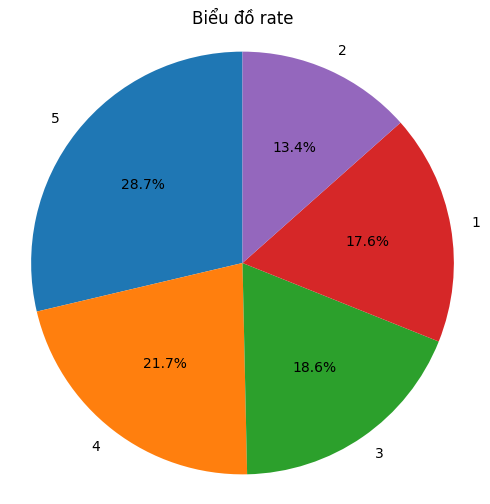

In [19]:
rate_counts = data_mining['rate'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(rate_counts, labels=rate_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ rate')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

Quan sát biểu đồ ta thấy rằng: các đánh giá chia làm 2 nửa bằng nhau trên biểu đồ, 4-5 tạo thành 1 nửa và 1-2-3 tạo thành nửa còn lại
=> đề xuất rời rạc về 2 loại: quite_good và bad_normal

In [20]:
data_mining['rate'].replace([1, 2, 3], 'bad_normal', inplace=True)
data_mining['rate'].replace([4, 5], 'quite_good', inplace=True)

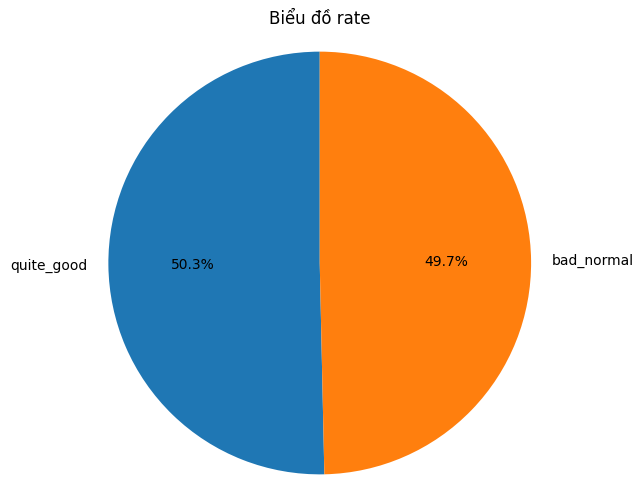

In [21]:
rate_counts = data_mining['rate'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(rate_counts, labels=rate_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ rate')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

## **3.2. Phân tích sản phẩm**

In [22]:
data_mining['name'].value_counts()

PIN SẠC SONY AA 4600mAh ( Hộp 4 viên )                                 28
Máy bay 4 cánh flycam Mini RH807 - Rh807h cố định                      27
Camera Wifi Trong Nhà Xoay 360 Ezviz C6N TY2 2M 4M 2K 1080P FULL HD    27
Dầu Mỡ VCK Lube Switch/Stab                                            26
Camera outdoor wifi PTZ mini 5G Yoosee                                 26
                                                                       ..
Set dụng cụ vệ sinh ống kính máy ảnh chuyên nghiệp 6 trong 24           1
Set dụng cụ vệ sinh ống kính máy ảnh chuyên nghiệp 6 trong 23           1
Set dụng cụ vệ sinh ống kính máy ảnh chuyên nghiệp 6 trong 22           1
Set dụng cụ vệ sinh ống kính máy ảnh chuyên nghiệp 6 trong 21           1
Bộ sạc pin AA AAA Beston C9025                                          1
Name: name, Length: 430, dtype: int64

=> Số lượng giữa các sản phẩm không đều nhau, tiến hành phân tích theo phân loại sản phẩm

In [23]:
data_mining.drop('name', axis=1, inplace=True)

In [24]:
data_mining['type'].value_counts()

tai nghe               180
thẻ nhớ                174
camera                 168
phụ kiện camera        163
phụ kiện điện thoại    114
pin                     95
phụ kiện đồng hồ        92
phông nền               77
phụ kiện máy tính       73
usb                     68
flycam                  45
giá đỡ                  41
loa                     39
chống ẩm                37
chuột                   36
balo                    34
Name: type, dtype: int64

Rời rạc hóa các loại sản phẩm thành 3 nhóm:

**audio_and_video:** là các loại sản phẩm có chức năng ghi hình và phát âm thanh
- Tai nghe
- Camera
- Flycam
- Loa

**support_props:** là các đạo cụ hỗ trợ cho nhóm audio_and_video
- Thẻ nhớ
- Phụ kiện camera
- USB
- Phông nền

**peronal_items:** các vật dụng, thiết bị cá nhân
- Phụ kiện điện thoại
- Phụ kiện đồng hồ
- Phụ kiện máy tính
- Giá đỡ
- Chống ẩm
- Chuột
- Balo
- Pin

In [25]:
data_mining['type'].replace(['tai nghe', 'camera', 'flycam', 'loa'], 'audio_and_video', inplace=True)
data_mining['type'].replace(['thẻ nhớ', 'phụ kiện camera', 'usb', 'phông nền'], 'support_props', inplace=True)
data_mining['type'].replace(['phụ kiện điện thoại', 'phụ kiện đồng hồ', 'phụ kiện máy tính', 'giá đỡ', 'chống ẩm', 'chuột', 'balo', 'pin'], 'peronal_items', inplace=True)

In [26]:
data_mining['type'].value_counts()

peronal_items      522
support_props      482
audio_and_video    432
Name: type, dtype: int64

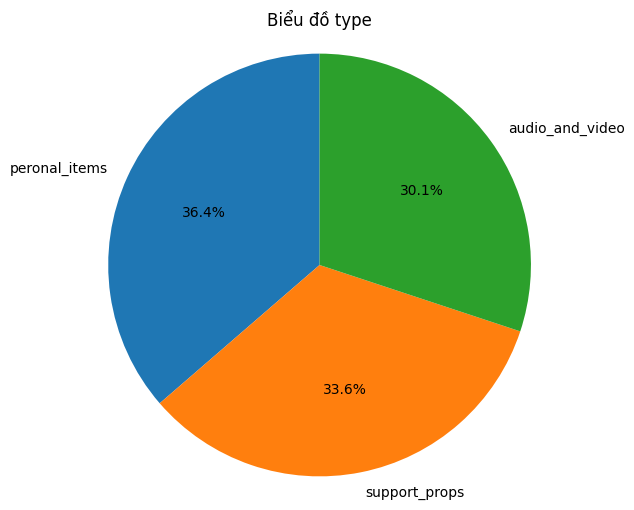

In [27]:
type_counts = data_mining['type'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ type')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

**Sau khi rời rạc hóa thì số lượng giữa các nhóm có sự chênh lệch không đáng kể**

In [28]:
pivot_table = pd.pivot_table(data_mining[['type', 'rate']], index='type', columns='rate', aggfunc=len, fill_value=0, margins=True)
print(pivot_table)

rate             bad_normal  quite_good   All
type                                         
audio_and_video         223         209   432
peronal_items           261         261   522
support_props           229         253   482
All                     713         723  1436


**Số lượng đánh giá phân bố đều nhau giữa các loại sản phẩm**

## **3.3. Phân tích bình luận**

### **Số lượng của các từ xuất hiện trong comment**

In [29]:
pd.Series(" ".join(data_mining['tokenized_data']).split())

0          nhỏ
1          gọn
2         giao
3         hàng
4        nhanh
         ...  
32879      cái
32880      đều
32881       bị
32882      hết
32883     chán
Length: 32884, dtype: object

In [30]:
words = pd.Series(" ".join(data_mining['tokenized_data']).split()).value_counts()
words

không        1099
hàng          734
được          567
tốt           531
shop          513
             ... 
gương_lậy       1
hụt             1
wng             1
trôi_ý          1
tv              1
Length: 3765, dtype: int64

**Chỉ giữ lại những từ có số lần xuất hiện trên 10 lần**

In [31]:
# Lấy ra các từ chỉ xuất hiện một lần
lessthan10_word = words[words <= 10].index.tolist()

# In ra danh sách các từ chỉ xuất hiện một lần
print(len(lessthan10_word))
print(lessthan10_word)

3325
['chai', 'sang', 'hai', 'nhanh_chóng', 'led', 'nổi', 'khui', 'tắt', '…', 'da', 'khóa', 'vệ_sinh', 'god', 'thế_này', 'đây', 'đòi_hỏi', 'tương_đối', 'sửa', 'đắt', 'ta', 'nấc', 'cam', 'lau', 'xíu', 'anh', 'thân_thiện', 'tiếp_tục', 'quà', 'box', 'tấm', 'o', 'phát', 'hề', 'ngắn', 'sự', 'giấy', 'trải_nghiệm', 'kêu', 'xấu', 'cảm_giác', 'mờ', 'méo', 'tại', 'chả', 'cây', 'lỏng', 'ơi', 'lưu', 'săn', 'chú_ý', 'lỏng_lẻo', 'tuột', 'copy', 'mạng', 'đứt', 'mạnh', 'thường', 'máy_tính', 'shope', 'trông', 'giữ', 'anh_em', 'xanh', 'dày', 'nóng', 'bt', 'balo', 'liên_hệ', 'lớp', 'switch', 'lube', 'quốc_tế', 'gài', 'ít', 'vô', 'x', 'gặp', 'lọ', 'gió', 'dữ_liệu', 'yên_tâm', 'ẩm', 'giá_cả', 'trầy_xước', 'vứt', 'thế_nào', 'lens', 'sơn', 'chê', 'khuyên', 'hình_thức', 'món', 'kia', 'bàn', 'bắt', 'cực_kỳ', 'bao', 'thấp', 'sợ', 'rõ_ràng', 'lâu_dài', 'sắt', 'hồi', 'mắt', 'bảo_vệ', 'bóng', 'file', 'móp_méo', 'vui', 'xốp', 'xuống', 'm', 'bong', 'nay', '₫', 'giúp', 'chiếc', 'tối', 'phút', 'bs', 'góc', 'rớt', 'dám

In [32]:
def remove_words(input_string):
    words = input_string.split()
    result_words = [word for word in words if word not in lessthan10_word]
    result_string = ' '.join(result_words)
    return result_string

In [33]:
# Loại bỏ các từ xuất hiện ít hơn 10 lần trong các bình luận
data_mining['tokenized_data'] = data_mining['tokenized_data'].apply(remove_words)

In [34]:
words = pd.Series(" ".join(data_mining['tokenized_data']).split()).value_counts()
words

không      1099
hàng        734
được        567
tốt         531
shop        513
           ... 
ổn_định      11
vỡ           11
bẩn          11
cục          11
bật          11
Length: 440, dtype: int64

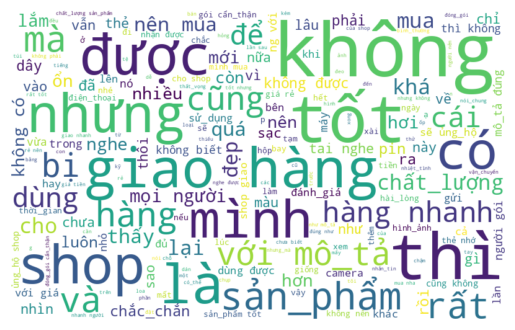

In [35]:
all_words = " ".join([sentence for sentence in data_mining['tokenized_data']])

wordcloud = WordCloud(background_color="white", width = 800, height = 500, random_state = 42, max_font_size = 120).generate(all_words)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### **Số lượng của các từ xuất hiện ở các đánh giá quite_good**

In [36]:
freq_words_rate45 = data_mining[data_mining['rate'] == 'quite_good']
freq_words_rate45

,rate,type,tokenized_data
0,quite_good,peronal_items,nhỏ gọn giao hàng nhanh đúng mẫu quá hài_lòng ...
1,quite_good,peronal_items,túi hơi mỏng hơn mong_đợi
2,quite_good,peronal_items,xinh nhỏ gọn với giá này phải nói quá tốt vì q...
4,quite_good,peronal_items,tốt bé bé bé bé phù_hợp đựng giá_thành n để đi
5,quite_good,peronal_items,ổn nhỏ khá nhỏ gọn p phần mặt ngoài nên có thêm
...,...,...,...
1426,quite_good,support_props,giao hàng nhanh chỉ cần gắn vào là kết_nối đượ...
1433,quite_good,support_props,sản_phẩm tạm ổn sài hơi nói_chung là cũng được...
1434,quite_good,support_props,sản_phẩm tốt giao khá nhanh chất_lượng tuyệt_v...
1435,quite_good,support_props,shop gọi điện trả_lời tư_vấn rất là nhiệt_tình...


In [37]:
words_rate45 = pd.Series(" ".join(freq_words_rate45['tokenized_data']).split()).value_counts()
words_rate45

# Lấy ra các từ chỉ xuất hiện một lần
lessthan3_word45 = words_rate45[words_rate45 <= 3].index.tolist()

# In ra danh sách các từ chỉ xuất hiện một lần
print(len(lessthan3_word45))
print(lessthan3_word45)

31
['chịu', 'nhắn_tin', 'tháng', 'b', 'trả_lời', 'bóc', 'ai', 'nút', 'gần', 'hôm', 'cùng', 'mặc_dù', 'nhau', 'bảo', 'đầy', 'nguồn', 'thất_vọng', 'đổi', 'toàn', 'hư', 'rè', 'trả', 'bung', 'nấy', 'bản', 'vỡ', 'chán', 'kém', 'làm_ăn', 'báo', 'thái_độ']


In [38]:
# Danh sách các key để xác định các dữ liệu sai label
key_data45 = ['thất_vọng', ' hư ', 'rè', 'trả', ' bung ', 'vỡ', 'chán', 'kém']

# Lọc các bình luận chứa các từ trong key_data45
filtered_comments = freq_words_rate45['tokenized_data'][freq_words_rate45['tokenized_data'].apply(lambda x: any(word in x for word in key_data45))]

# Hiển thị các bình luận được lọc
for i in filtered_comments:
  print(i)

mua cái trước thì có nhanh mua cái thứ về thì không có hơi thất_vọng
tuyệt_vời điều_khiển có khi sẽ được và để khi này rất tuyệt_vời sản_phẩm dễ điều_khiển cho người mới chơi camera bình_thường không quá nét cũng không đủ để nhìn bay rất lâu khoảng p sạc thì cũng khá nhanh khoảng p shop trả_lời tin nhắn nhanh nói_chung sản_phẩm này rất tuyệt_vời trong tầm giá nên mua
hình_ảnh in khá kém nhìn không rõ chất_liệu cũng không nhìn cũng thấy d chỗ nào với giá không với mình là khá nếu sản_phẩm như_vậy mà rẻ hơn thì sẽ hài_lòng hơn
sản_phẩm chắc_chắn có_thể chịu được nặng của một máy_ảnh luôn dễ bị nhưng có nhiều để sử_dụng lắm còn cái chỗ để điện_thoại thì hơi bị mỏng với yếu không chắc_chắn lắm dễ bung ra
màu hơn so với mẫu hơi thất_vọng chút giao hàng nhanh
giao hàng nhanh hàng được đóng_gói cẩn_thận nên rất chắc_chắn nên nhận hàng_không làm vỡ sản_phẩm lần sau sẽ ủng_hộ shop nhiều
ng với mô_tả đẹp đẹp nhé mọi người mình mua cả chất nhưng mình cho sao là có cường_lực nhưng ốp không cao hơn

**Sau khi quan sát các bình luận được lọc, nhóm xác định không có bình luận nào sai nhãn**

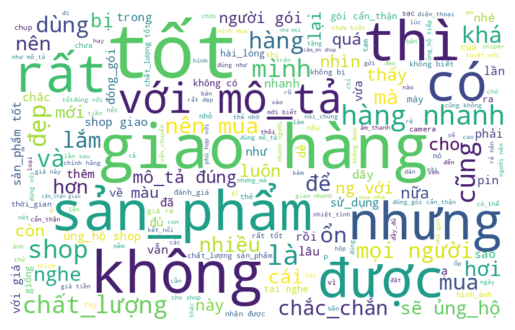

In [39]:
all_words45 = " ".join([sentence for sentence in data_mining['tokenized_data'][data_mining['rate'] == 'quite_good']])

wordcloud45 = WordCloud(background_color="white", width = 800, height = 500, random_state = 42, max_font_size = 120).generate(all_words45)

plt.imshow(wordcloud45, interpolation = "bilinear")
plt.axis("off")
plt.show()

### **Số lượng của các từ xuất hiện ở các đánh giá bad_normal**

In [40]:
freq_words_rate123 = data_mining[data_mining['rate'] == 'bad_normal']
freq_words_rate123

,rate,type,tokenized_data
3,bad_normal,peronal_items,bé tí cho
8,bad_normal,peronal_items,bị bung đồ ra không chắc_chắn nhắn_tin shop kh...
9,bad_normal,peronal_items,hình là nha mọi người đựng không có vừa chán
12,bad_normal,peronal_items,là nó bé lắm các ạ bé tí luôn mua cái này hoặc...
15,bad_normal,peronal_items,cái chốt bằng nhựa thì có cái bị hư không mở đ...
...,...,...,...
1430,bad_normal,support_props,mấy ngày đã hư
1431,bad_normal,support_props,mới dùng khá ổn
1432,bad_normal,support_props,sài vài hư mất
1437,bad_normal,support_props,sản_phẩm nhìn tốt đóng_gói cũng vậy nhưng khôn...


In [41]:
words_rate123 = pd.Series(" ".join(freq_words_rate123['tokenized_data']).split()).value_counts()
words_rate123

# Lấy ra các từ chỉ xuất hiện một lần
lessthan5_word123 = words_rate123[words_rate123 <= 5].index.tolist()

# In ra danh sách các từ chỉ xuất hiện một lần
print(len(lessthan5_word123))
print(lessthan5_word123)

52
['okđúng', 'á', 'tính_chất', 'chuẩn', 'game', 'tuy', 'chất_liệu', 'bật', 'chuẩn_bị', 'hoạt_động', 'nét', 'xa', 'cứng_cáp', 'độ', 'bluetoth', 'nghĩ', 'laptop', 'năm', 'dung_lượng', 'bộ', 'tội', 'đầy_đủ', 'chính', 'ổn_định', 'chặt', 'sốc', 'nặng', 'may', 'tiếp', 'thích', 'ấy', 'chờ', 'thanh', 'xịn', 'gọn', 'hy_vọng', 'cài_đặt', 'tuyệt_vời', 'ngon', 'mềm', 'giá_thành', 'số_lượng', 'siêu', 'nè', 'nhu_cầu', 'dễ_thương', 'có_điều', 'mức', 'giảm_giá', 'hợp_lý', 'xinh', 'tốtđúng']


In [42]:
# Danh sách các key để xác định các dữ liệu sai label
key_data123 = ['ok', ' chuẩn ', 'nét', 'cứng_cáp', 'đầy_đủ', 'ổn_định', 'chặt', 'thích', 'xịn', 'gọn', 'tuyệt_vời', 'ngon', 'mềm', 'siêu', 'dễ_thương', 'giảm_giá', 'hợp_lý', 'xinh', 'tốt', 'đúng']

# Lọc các bình luận chứa các từ trong key_data123
filtered_comments = freq_words_rate123['tokenized_data'][freq_words_rate123['tokenized_data'].apply(lambda x: any(word in x for word in key_data123))]

# Hiển thị các bình luận được lọc
for i in filtered_comments:
  print(i)

là nó bé lắm các ạ bé tí luôn mua cái này hoặc đeo cho hợp_lý các
tốt mình đó là dây mỏng sẽ
mở bọc ra nhìn thấy mà hết cả phần thì bẩn phần thì xước nặng nhắn_tin cho shop thì shop bảo do vận_chuyển mình bấm đổi trả hàng nhưng lỗi của mình là đã bấm nhận hàng trước khi mở hàng rồi nên cũng không đổi trả được phần cái bẩn ra bên trong tốt
camera wifi là cả nhà nhé cái nhựa cắm vào thì được camera wifi để nhưng vẫn không được nét cho lắm quá so với tầm tiền
dùng được camera rất thích shop này nhiệt_tình giao hàng rất nhanh trước mua camera đúng chất_lượng mô_tả nhưng giờ chất_lượng kém quá chỉ được chỉ h d thôi
lúc được lúc không hàng quá kém mọi người đừng nên mua mua ở shop ngoài thì tốt hơn
t mà shop giao d là của như nhau nhưng không phải cứ nhiều là tốt nhiều thì nhiều làm camera nên nhận cái dùng vẫn ổn đấy nhưng mình không hài_lòng chút nào shop phải gọi hỏi mình trước khi gửi
hình_ảnh tốt mình nghe từ camera rất điện_thoại tốt
không kiểm_tra hàng khi bán hàng lỗi cho người vận_c

**Các bình luận chứa các từ sau cần sửa lại nhãn: " chuẩn ", " siêu ", "dễ_thương"**

In [43]:
# Danh sách các từ để kiểm tra trong bình luận
positive_words = [" chuẩn ", " siêu ", "dễ_thương"]
freq_words_rate123
# Sửa lại nhãn trong cột 'rate'
freq_words_rate123['rate'] = freq_words_rate123.apply(lambda row: 'quite_good' if any(word in row['tokenized_data'] for word in positive_words) else row['rate'], axis=1)

<ipython-input-43-04a7d66263b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_words_rate123['rate'] = freq_words_rate123.apply(lambda row: 'quite_good' if any(word in row['tokenized_data'] for word in positive_words) else row['rate'], axis=1)


In [44]:
# Hiển thị DataFrame sau khi sửa lại nhãn
freq_words_rate123[freq_words_rate123["rate"] == "quite_good"]

,rate,type,tokenized_data
113,quite_good,audio_and_video,lần thứ mua hàng shop rồi chất_lượng sản_phẩm ...
159,quite_good,audio_and_video,bị lỗi nhưng đẹp lắm á cũng chất_lượng giao nh...
916,quite_good,peronal_items,tốt okđúng với mô_tả giá sao vì là cái thứ mìn...
1023,quite_good,audio_and_video,tạm nút này gắn vào khó nha kiểu nút tai bỏ và...
1232,quite_good,support_props,hàng chuẩn như quảng_cáo chất dùng lúc nhận lú...


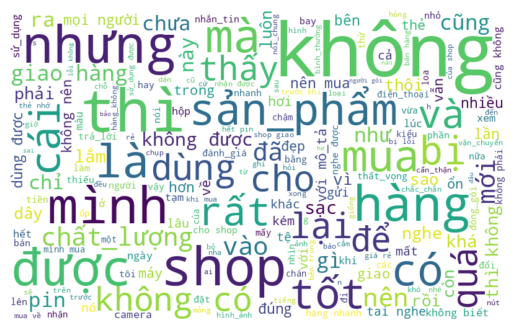

In [45]:
all_words123 = " ".join([sentence for sentence in data_mining['tokenized_data'][data_mining['rate'] == 'bad_normal']])

wordcloud123 = WordCloud(background_color="white", width = 800, height = 500, random_state = 42, max_font_size = 120).generate(all_words123)

plt.imshow(wordcloud123, interpolation = "bilinear")
plt.axis("off")
plt.show()

# **4. Xây dựng mô hình phân lớp**

In [46]:
data_classify = data_mining[['rate', 'tokenized_data']].copy()
data_classify

,rate,tokenized_data
0,quite_good,nhỏ gọn giao hàng nhanh đúng mẫu quá hài_lòng ...
1,quite_good,túi hơi mỏng hơn mong_đợi
2,quite_good,xinh nhỏ gọn với giá này phải nói quá tốt vì q...
3,bad_normal,bé tí cho
4,quite_good,tốt bé bé bé bé phù_hợp đựng giá_thành n để đi
...,...,...
1434,quite_good,sản_phẩm tốt giao khá nhanh chất_lượng tuyệt_v...
1435,quite_good,shop gọi điện trả_lời tư_vấn rất là nhiệt_tình...
1436,quite_good,tốt tốt shop giao hàng siêu nhanh lại thêm cả ...
1437,bad_normal,sản_phẩm nhìn tốt đóng_gói cũng vậy nhưng khôn...


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## **4.1. Mã hóa dữ liệu**

In [48]:
# Chuyển đổi biến phân loại thành dạng số
data_classify = pd.get_dummies(data_classify, columns=['rate'], prefix=['rate'], drop_first= True)

In [49]:
data_classify

,tokenized_data,rate_quite_good
0,nhỏ gọn giao hàng nhanh đúng mẫu quá hài_lòng ...,1
1,túi hơi mỏng hơn mong_đợi,1
2,xinh nhỏ gọn với giá này phải nói quá tốt vì q...,1
3,bé tí cho,0
4,tốt bé bé bé bé phù_hợp đựng giá_thành n để đi,1
...,...,...
1434,sản_phẩm tốt giao khá nhanh chất_lượng tuyệt_v...,1
1435,shop gọi điện trả_lời tư_vấn rất là nhiệt_tình...,1
1436,tốt tốt shop giao hàng siêu nhanh lại thêm cả ...,1
1437,sản_phẩm nhìn tốt đóng_gói cũng vậy nhưng khôn...,0


## **4.2. Phân chia dữ liệu**

In [50]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data_classify['tokenized_data'], data_classify['rate_quite_good'], test_size=0.2, random_state=42)

## **4.3. Vector hóa dữ liệu**

In [51]:
# Sử dụng TF-IDF để chuyển đổi văn bản thành ma trận features
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [52]:
# Hiển thị kích thước của ma trận TF-IDF cho X_train và X_test
print("Kích thước ma trận TF-IDF cho X_train:", X_train.shape)
print("Kích thước ma trận TF-IDF cho X_test:", X_test.shape)

Kích thước ma trận TF-IDF cho X_train: (1148, 424)
Kích thước ma trận TF-IDF cho X_test: (288, 424)



Kích thước ma trận TF-IDF cho X_train là (1148, 424) có ý nghĩa như sau:

1148: Số lượng mẫu trong tập huấn luyện X_train. Đây là số lượng bình luận hoặc văn bản mà bạn sử dụng để huấn luyện mô hình.

424: Số lượng từ duy nhất (hoặc đặc trưng) trong không gian từ vựng được xây dựng từ dữ liệu huấn luyện X_train. Điều này là số lượng cột trong ma trận TF-IDF, mỗi cột tương ứng với một từ trong không gian từ vựng.

Vì vậy, ma trận có 1148 hàng (mẫu) và 424 cột (từ đặc trưng). Mỗi giá trị trong ma trận tại vị trí (i, j) biểu thị trọng số TF-IDF của từ j trong mẫu i. Ma trận thường là một ma trận sparse, nghĩa là nhiều giá trị trong ma trận có thể là 0, vì không phải tất cả các từ xuất hiện trong mỗi văn bản.

## **4.4. Xây dựng mô hình**

### **4.4.1. SVM**

In [53]:
# # Khởi tạo mô hình SVM
# svm_model = SVC()

# # Thiết lập các tham số cần tìm kiếm
# param_grid = {'C': [0.1, 1, 10],
#               'kernel': ['linear', 'poly', 'rbf'],
#               'gamma': [0.1, 1, 'scale', 'auto'],
#               'degree': [2, 3, 4],
#               'coef0': [0.0, 1.0, 2.0],
#               'shrinking': [True, False]}

# # Khởi tạo GridSearchCV với mô hình, tham số và số lượng fold trong cross-validation (cv)
# grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Huấn luyện GridSearchCV trên dữ liệu
# grid_search_svm.fit(X_train, y_train)

# # In ra các tham số tốt nhất
# print("Best Parameters:", grid_search_svm.best_params_)

In [54]:
# Best Parameters: {'C': 0.1, 'coef0': 2.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}

In [55]:
# Xây dựng mô hình SVM
svm_model = SVC(C= 0.1, coef0= 2.0, degree= 2, gamma= 'scale', kernel= 'poly', shrinking= True)
svm_model.fit(X_train, y_train)

SVC(C=0.1, coef0=2.0, degree=2, kernel='poly')

In [56]:
# Kiểm thử mô hình
y_pred_svm = svm_model.predict(X_test)



---


**Không lấy phần sau**

In [57]:
# # Assume comment_text is the new comment you want to predict
# comment_text = input("Vui lòng nhập bình luận: ")

# # Preprocess the new comment
# comment_tfidf = tfidf_vectorizer.transform([comment_text])

# # Predict the sentiment of the new comment
# # new_comment_prediction = grid_search_svm.best_estimator_.predict(comment_tfidf)
# new_comment_prediction = svm_model.predict(comment_tfidf)

# print(f'Predicted Rate for the new comment: {new_comment_prediction[0]}')

### **4.4.2. Maxent: Logistic Regression**

In [58]:
# # Tạo mô hình Logistic Regression
# model = LogisticRegression()

# # Định nghĩa các tham số cần tối ưu
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#               'penalty': ['l1', 'l2', 'l1+l2'],
#               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'max_iter': [100, 200, 300],
#               'multi_class': ['ovr', 'multinomial']}

# # Tạo đối tượng GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Thực hiện grid search trên tập huấn luyện
# grid_search.fit(X_train, y_train)

# # Hiển thị kết quả tối ưu
# print("Best parameters: ", grid_search.best_params_)

In [59]:
# Best parameters:  {'C': 1, 'max_iter': 300, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}

In [60]:
# Huấn luyện mô hình Maxent (Logistic Regression)
maxent_model = LogisticRegression(C=1, max_iter=300, multi_class='ovr', penalty='l2', solver='saga')
maxent_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=300, multi_class='ovr', solver='saga')

In [61]:
# Dự đoán trên tập kiểm tra
y_pred_maxent = maxent_model.predict(X_test)



---


**Không lấy phần này**

In [62]:
# # Assume comment_text is the new comment you want to predict
# comment_text = input("Vui lòng nhập bình luận: ")

# # Preprocess the new comment
# comment_tfidf = tfidf_vectorizer.transform([comment_text])

# # Predict the sentiment of the new comment
# new_comment_prediction = maxent_model.predict(comment_tfidf)

# print(f'Predicted Rate for the new comment: {new_comment_prediction[0]}')

### **4.4.3. Mô hình học sâu LSTM**

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(data_classify['tokenized_data'], data_classify['rate_quite_good'], test_size=0.2, random_state=42)

In [65]:
# Tiền xử lý văn bản
max_words = 500  # Số từ tối đa trong từ điển
max_len = 100  # Độ dài tối đa của mỗi chuỗi

# Chuyển đổi văn bản thành các chuỗi số nguyên.
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_lstm)

X_train_lstm = tokenizer.texts_to_sequences(X_train_lstm)
X_test_lstm = tokenizer.texts_to_sequences(X_test_lstm)

# Đảm bảo rằng tất cả các chuỗi có cùng độ dài (max_len) bằng cách thêm đệm hoặc cắt bớt.
X_train_lstm = pad_sequences(X_train_lstm, maxlen=max_len, padding='post')
X_test_lstm = pad_sequences(X_test_lstm, maxlen=max_len, padding='post')

In [66]:
# Xây dựng mô hình LSTM
# Khởi tạo mô hình
model_lstm = Sequential()
# Embedding Layer
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# Bidirectional LSTM (Long Short-Term Memory)
model_lstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_lstm.add(Bidirectional(LSTM(32)))
# Dense Layer
model_lstm.add(Dense(64, activation='relu'))
# Dropout Layer
model_lstm.add(Dropout(0.5))
# Batch Normalization Layer
model_lstm.add(BatchNormalization())
model_lstm.add(Dense(1, activation='sigmoid'))

In [67]:
# Biên soạn cho mô hình
# Chọn thuật toán tối ưu, hàm mất mát và độ đo hiệu suất
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Sử dụng early stopping để tránh overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [68]:
# Huấn luyện mô hình
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping])

Epoch 1/10
36/36 [==============================] - 21s 360ms/step - loss: 0.6363 - accuracy: 0.6176 - val_loss: 0.6672 - val_accuracy: 0.7431
Epoch 2/10
36/36 [==============================] - 11s 310ms/step - loss: 0.4896 - accuracy: 0.7753 - val_loss: 0.6244 - val_accuracy: 0.7326
Epoch 3/10
36/36 [==============================] - 8s 225ms/step - loss: 0.3907 - accuracy: 0.8362 - val_loss: 0.6002 - val_accuracy: 0.6562
Epoch 4/10
36/36 [==============================] - 11s 311ms/step - loss: 0.3255 - accuracy: 0.8632 - val_loss: 0.5198 - val_accuracy: 0.7604
Epoch 5/10
36/36 [==============================] - 9s 248ms/step - loss: 0.2978 - accuracy: 0.8807 - val_loss: 0.5532 - val_accuracy: 0.7049
Epoch 6/10
36/36 [==============================] - 10s 283ms/step - loss: 0.2477 - accuracy: 0.9094 - val_loss: 0.5271 - val_accuracy: 0.7396
Epoch 7/10
36/36 [==============================] - 11s 307ms/step - loss: 0.2422 - accuracy: 0.9033 - val_loss: 0.5155 - val_accuracy: 0.7604
E

In [69]:
# Thực hiện dự đoán trên tập kiểm tra
predictions = model_lstm.predict(X_test_lstm)

# Chuyển đổi dự đoán thành nhãn nhị phân (ví dụ: ngưỡng 0.5)
y_pred_lstm = (predictions > 0.5).astype(int)

# In kết quả
print("Predictions:", y_pred_lstm.flatten())

9/9 [==============================] - 3s 96ms/step
Predictions: [0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1]




---


**Không lấy phần này**

In [70]:
# # Giả sử newData là dữ liệu mới cần dự đoán, trong định dạng văn bản tương tự như đã sử dụng cho mô hình huấn luyện
# newData = ["Giao hàng quá lâu"]

# # Tiền xử lý văn bản cho dữ liệu mới
# newData_seq = tokenizer.texts_to_sequences(newData)
# newData_pad = pad_sequences(newData_seq, maxlen=max_len, padding='post')

# # Thực hiện dự đoán
# new_predictions = model_lstm.predict(newData_pad)

# # Chuyển đổi dự đoán thành nhãn nhị phân (ví dụ: ngưỡng 0.5)
# binary_new_predictions = (new_predictions > 0.5).astype(int)

# # In kết quả
# print("New Predictions:", binary_new_predictions.flatten())

# **5. Phân tích và đánh giá**

## **5.1. Xây dựng hàm đánh giá**

In [71]:
# Đánh giá mô hình
from sklearn                 import metrics
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc, roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, make_scorer
from tabulate import tabulate  # Install using: pip install tabulate

In [72]:
# Hàm đánh giá
def classification_eval(y_test, y_pred):
    accuracy  = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall    = round(recall_score(y_test, y_pred) * 100, 2)
    f1        = round(f1_score(y_test, y_pred) * 100, 2)
    return accuracy, precision, recall, f1

## **5.2. Đánh giá các mô hình**

In [73]:
# Ma trận nhầm lẫn SVM
print('SVM')
print(confusion_matrix(y_test, y_pred_svm))
# Ma trận nhầm lẫn Maxent
print('Maxent')
print(confusion_matrix(y_test, y_pred_maxent))
# Ma trận nhầm lẫn LSTM
print('LSTM')
print(confusion_matrix(y_test, y_pred_lstm))

SVM
[[116  35]
 [ 29 108]]
Maxent
[[111  40]
 [ 27 110]]
LSTM
[[114  37]
 [ 32 105]]


In [74]:
# Đánh giá mô hình SVM
accuracy_svm, precision_svm, recall_svm, f1_svm = classification_eval(y_test, y_pred_svm)

# Đánh giá mô hình Maxent
accuracy_maxent, precision_maxent, recall_maxent, f1_maxent = classification_eval(y_test, y_pred_maxent)

# Đánh giá mô hình LSTM
accuracy_lstm, precision_lstm, recall_lstm, f1_lstm = classification_eval(y_test, y_pred_lstm)

# Tạo DataFrame để hiển thị kết quả
results = pd.DataFrame({
    'Model': ['SVM', 'Maxent', 'LSTM'],
    'Accuracy': [accuracy_svm, accuracy_maxent, accuracy_lstm],
    'Precision': [precision_svm, precision_maxent, precision_lstm],
    'Recall': [recall_svm, recall_maxent, recall_lstm],
    'F1 Score': [f1_svm, f1_maxent, f1_lstm]
})

# In ra kết quả
print(tabulate(results, headers='keys', tablefmt='pretty', showindex=False))

+--------+----------+-----------+--------+----------+
| Model  | Accuracy | Precision | Recall | F1 Score |
+--------+----------+-----------+--------+----------+
|  SVM   |  77.78   |   75.52   | 78.83  |  77.14   |
| Maxent |  76.74   |   73.33   | 80.29  |  76.66   |
|  LSTM  |  76.04   |   73.94   | 76.64  |  75.27   |
+--------+----------+-----------+--------+----------+


### **=> Xét các hệ số đánh giá thì nhóm quyết định chọn mô hình SVM để giải quyết bài toán**

# **6. Xây dựng giao diện**

In [77]:
!pip install -q gradio

In [79]:
import gradio as gr

In [ ]:
# Xây dựng hàm dự đoán cho UI

def predict_sentiment(comment):
    # Dự đoán sentiment bằng mô hình maxent
    # Xử lý dữ liệu mới
    comment = data_processing(comment)
    comment = underthesea.word_tokenize(comment, format="text")
    comment_tfidf = tfidf_vectorizer.transform([comment])

    # Dự đoán dữ liệu mới
    result = 0
    for i in range(100):
        new_comment_prediction = svm_model.predict(comment_tfidf)
        sentiment = new_comment_prediction[0]
        if sentiment == True:
            result += 1
    if result >=90:
        return True
    else:
        return False

# Định nghĩa hàm hiển thị kết quả dự đoán
def display_result(comment):
    sentiment = predict_sentiment(comment)
    if sentiment == True:
        return "Đánh giá tích cực!"
    else:
        return "Đánh giá tiêu cực."


# Xây dựng giao diện Gradio với hàm hiển thị
iface = gr.Interface(
    fn=display_result,
    inputs=gr.Textbox(),
    outputs="text",
    live=True
)

# Lan truyền chạy Gradio
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9512f50ab65153abb7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
